In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
telecom_df = pd.read_csv('data/telecom_churn.csv')

In [3]:
# Получаем информацию и меняем тип столбца
telecom_df.info()
telecom_df.describe()
telecom_df['Churn'] = telecom_df['Churn'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [4]:
# Считаем совпадения по каждым данным и сортируем по двум столбцам
telecom_df['Area code'].value_counts()
telecom_df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
688                      21              315.6              105   
2259                     31              313.8               87   
534                       0              310.4               97   
575                      36              309.9               90   
2858                     28              308.0              123   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71             17.76   
2259             53.35              147.7              103             12.55   
534              52.77               66.5              123              5.65   
575              52.68              200.3               89             17.03   
2858             52.36              247.8              128             21.06   

      Total night minutes  Total night calls  Total night charge  \
688                 260.1                123               11.70   
2259                192.7                 97                8.67   
534                 246.5                 99               11.09   
575                 183.5                105                8.26   
2858                152.9                103                6.88   

      Total intl minutes  Total intl calls  Total intl charge  \
688                 12.1                 3               3.27   
2259                10.1                 7               2.73   
534                  9.2                10               2.48   
575                 14.2                 2               3.83   
2858                 7.4                 3               2.00   

      Customer service calls  Churn  
688                        3      0  
2259                       3      0  
534                        4      0  
575                        1      0  
2858                       1      0

In [6]:
# Определяем только нужные стоки и столбцы
print(telecom_df[telecom_df['Churn'] == 1]['Total day minutes'].mean(),
      telecom_df[(telecom_df['Churn'] == 0) & (telecom_df['International plan'] == 'No')]['Total intl minutes'].max()
     )

206.91407867494823 18.9


In [11]:
# .loc ищет по названию, а .iloc по порядковому номеру
print(telecom_df.loc[0:5, 'State':'Area code'], '\n', 
      telecom_df.iloc[0:5, 0:3]
     )

  State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510 
   State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415


In [15]:
# Применить функцию к каждому столбцу
telecom_df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [16]:
# Перебираем все значения в колонке. Если не поставить пробел между : в dic_for_change, map будет считывать : как часть символа
dic_for_change = {'No' : False, 'Yes' : True}
telecom_df['International plan'] = telecom_df['International plan'].map(dic_for_change)

# Или более короткий вариант кода выше
telecom_df = telecom_df.replace({'Voice mail plan': dic_for_change})
telecom_df

State  Account length  Area code  International plan  Voice mail plan  \
0       KS             128        415               False             True   
1       OH             107        415               False             True   
2       NJ             137        415               False            False   
3       OH              84        408                True            False   
4       OK              75        415                True            False   
5       AL             118        510                True            False   
6       MA             121        510               False             True   
7       MO             147        415                True            False   
8       LA             117        408               False            False   
9       WV             141        415                True             True   
10      IN              65        415               False            False   
11      RI              74        415               False            False   
12      IA             168        408               False            False   
13      MT              95        510               False            False   
14      IA              62        415               False            False   
15      NY             161        415               False            False   
16      ID              85        408               False             True   
17      VT              93        510               False            False   
18      VA              76        510               False             True   
19      TX              73        415               False            False   
20      FL             147        415               False            False   
21      CO              77        408               False            False   
22      AZ             130        415               False            False   
23      SC             111        415               False            False   
24      VA             132        510               False            False   
25      NE             174        415               False            False   
26      WY              57        408               False             True   
27      MT              54        408               False            False   
28      MO              20        415               False            False   
29      HI              49        510               False            False   
30      IL             142        415               False            False   
31      NH              75        510               False            False   
32      LA             172        408               False            False   
33      AZ              12        408               False            False   
34      OK              57        408               False             True   
35      GA              72        415               False             True   
36      AK              36        408               False             True   
37      MA              78        415               False            False   
38      AK             136        415                True             True   
39      NJ             149        408               False            False   
40      GA              98        408               False            False   
41      MD             135        408                True             True   
42      AR              34        510               False            False   
43      ID             160        415               False            False   
44      WI              64        510               False            False   
45      OR              59        408               False             True   
46      MI              65        415               False            False   
47      DE             142        408               False            False   
48      ID             119        415               False            False   
49      WY              97        415               False             True   
...    ...             ... 

In [17]:
# Группировка на основе данных из столбца
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
telecom_df.groupby('Churn')[columns_to_show].agg([np.mean, np.std, np.min, np.max])

# Или более простой вариант кода выше
telecom_df.groupby('Churn')[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

In [22]:
# Таблицы сопряжённости
pd.crosstab(telecom_df['Churn'], [telecom_df['International plan'], telecom_df['Voice mail plan']], normalize=True)

International plan     False               True           
Voice mail plan        False     True      False     True 
Churn                                                     
0                   0.563456  0.235824  0.039004  0.016802
1                   0.090609  0.013201  0.030303  0.010801

In [23]:
# Сводная таблица
telecom_df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'], aggfunc='mean')

Total day calls  Total eve calls  Total night calls
Area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

In [24]:
# Вставить новый столбец
total_calls = telecom_df['Total day calls'] + telecom_df['Total eve calls'] + telecom_df['Total night calls'] + telecom_df['Total intl calls']
telecom_df.insert(loc=len(telecom_df.columns), column='Total calls', value=total_calls)
telecom_df

# Более простой способ
telecom_df['Total charge'] =  telecom_df['Total day charge'] + telecom_df['Total eve charge'] + telecom_df['Total night charge'] + telecom_df['Total intl charge']
telecom_df

State  Account length  Area code  International plan  Voice mail plan  \
0       KS             128        415               False             True   
1       OH             107        415               False             True   
2       NJ             137        415               False            False   
3       OH              84        408                True            False   
4       OK              75        415                True            False   
5       AL             118        510                True            False   
6       MA             121        510               False             True   
7       MO             147        415                True            False   
8       LA             117        408               False            False   
9       WV             141        415                True             True   
10      IN              65        415               False            False   
11      RI              74        415               False            False   
12      IA             168        408               False            False   
13      MT              95        510               False            False   
14      IA              62        415               False            False   
15      NY             161        415               False            False   
16      ID              85        408               False             True   
17      VT              93        510               False            False   
18      VA              76        510               False             True   
19      TX              73        415               False            False   
20      FL             147        415               False            False   
21      CO              77        408               False            False   
22      AZ             130        415               False            False   
23      SC             111        415               False            False   
24      VA             132        510               False            False   
25      NE             174        415               False            False   
26      WY              57        408               False             True   
27      MT              54        408               False            False   
28      MO              20        415               False            False   
29      HI              49        510               False            False   
30      IL             142        415               False            False   
31      NH              75        510               False            False   
32      LA             172        408               False            False   
33      AZ              12        408               False            False   
34      OK              57        408               False             True   
35      GA              72        415               False             True   
36      AK              36        408               False             True   
37      MA              78        415               False            False   
38      AK             136        415                True             True   
39      NJ             149        408               False            False   
40      GA              98        408               False            False   
41      MD             135        408                True             True   
42      AR              34        510               False            False   
43      ID             160        415               False            False   
44      WI              64        510               False            False   
45      OR              59        408               False             True   
46      MI              65        415               False            False   
47      DE             142        408               False            False   
48      ID             119        415               False            False   
49      WY              97        415               False             True   
...    ...             ... 

In [25]:
# Удаляем столбец или строку, разными вариантами
telecom_df = telecom_df.drop(['Total charge', 'Total calls'], axis=1)
telecom_df.drop([1, 2])

State  Account length  Area code  International plan  Voice mail plan  \
0       KS             128        415               False             True   
3       OH              84        408                True            False   
4       OK              75        415                True            False   
5       AL             118        510                True            False   
6       MA             121        510               False             True   
7       MO             147        415                True            False   
8       LA             117        408               False            False   
9       WV             141        415                True             True   
10      IN              65        415               False            False   
11      RI              74        415               False            False   
12      IA             168        408               False            False   
13      MT              95        510               False            False   
14      IA              62        415               False            False   
15      NY             161        415               False            False   
16      ID              85        408               False             True   
17      VT              93        510               False            False   
18      VA              76        510               False             True   
19      TX              73        415               False            False   
20      FL             147        415               False            False   
21      CO              77        408               False            False   
22      AZ             130        415               False            False   
23      SC             111        415               False            False   
24      VA             132        510               False            False   
25      NE             174        415               False            False   
26      WY              57        408               False             True   
27      MT              54        408               False            False   
28      MO              20        415               False            False   
29      HI              49        510               False            False   
30      IL             142        415               False            False   
31      NH              75        510               False            False   
32      LA             172        408               False            False   
33      AZ              12        408               False            False   
34      OK              57        408               False             True   
35      GA              72        415               False             True   
36      AK              36        408               False             True   
37      MA              78        415               False            False   
38      AK             136        415                True             True   
39      NJ             149        408               False            False   
40      GA              98        408               False            False   
41      MD             135        408                True             True   
42      AR              34        510               False            False   
43      ID             160        415               False            False   
44      WI              64        510               False            False   
45      OR              59        408               False             True   
46      MI              65        415               False            False   
47      DE             142        408               False            False   
48      ID             119        415               False            False   
49      WY              97        415               False             True   
50      IA              52        408               False            False   
51      IN              60        408               False            False   
...    ...             ... 

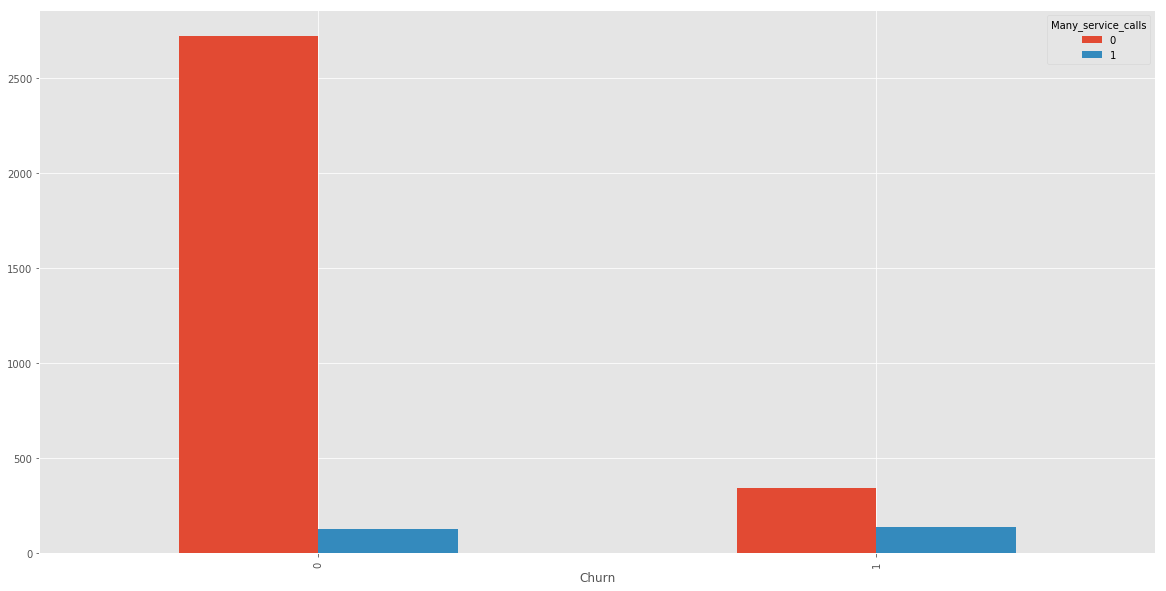

In [104]:
# Создаём таблицы сопряжённости и выводим график
interplan_cross = pd.crosstab(telecom_df['Churn'], telecom_df['International plan'], normalize=True, margins=True)
servcalls_cross = pd.crosstab(telecom_df['Churn'], telecom_df['Customer service calls'], normalize=True)

telecom_df['Many_service_calls'] = (telecom_df['Customer service calls'] > 3).astype('int')
servcalls_cross = pd.crosstab(telecom_df['Many_service_calls'], telecom_df['Churn'])
servcalls_cross = servcalls_cross.T
servcalls_cross.plot(kind='bar',figsize=(20, 10))

In [105]:
pd.crosstab(telecom_df['Many_service_calls'] & telecom_df['International plan'], telecom_df['Churn'])

Churn     0    1
row_0           
False  2841  464
True      9   19